In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from glob import glob



In [2]:
# Load the model
filename = '../notebooks/catboost_model.pkl'
model = pickle.load(open(filename, 'rb'))

In [3]:
# Function to predict, plot, and display statistics
def predict_plot_statistics(ax, data):
    # Split data into X and y
    X = data.drop('TS', axis=1)
    y = data['TS']
    years = data['YEAR']  # Extracting the 'YEAR' variable

    # Scale data
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Predict
    y_pred = model.predict(X)

    # Plot predictions vs actual
    ax.scatter(y, y_pred, color='green')
    ax.set_xlabel('True Values')
    ax.set_ylabel('Predictions')

    # Calculate RMSE and R^2
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    r_squared = r2_score(y, y_pred)

    # Annotate the plot with RMSE, R^2, and Year on the bottom right
    ax.text(ax.get_xlim()[1], ax.get_ylim()[0], f'YEAR: {years.iloc[0]}\nRMSE: {rmse:.4f}\nR^2: {r_squared:.4f}', verticalalignment='bottom', horizontalalignment='right', fontsize=17)


Processing ../data\test1.csv...
Processing ../data\test10.csv...
Processing ../data\test11.csv...
Processing ../data\test12.csv...
Processing ../data\test2.csv...
Processing ../data\test3.csv...
Processing ../data\test4.csv...
Processing ../data\test5.csv...
Processing ../data\test6.csv...
Processing ../data\test7.csv...
Processing ../data\test8.csv...
Processing ../data\test9.csv...


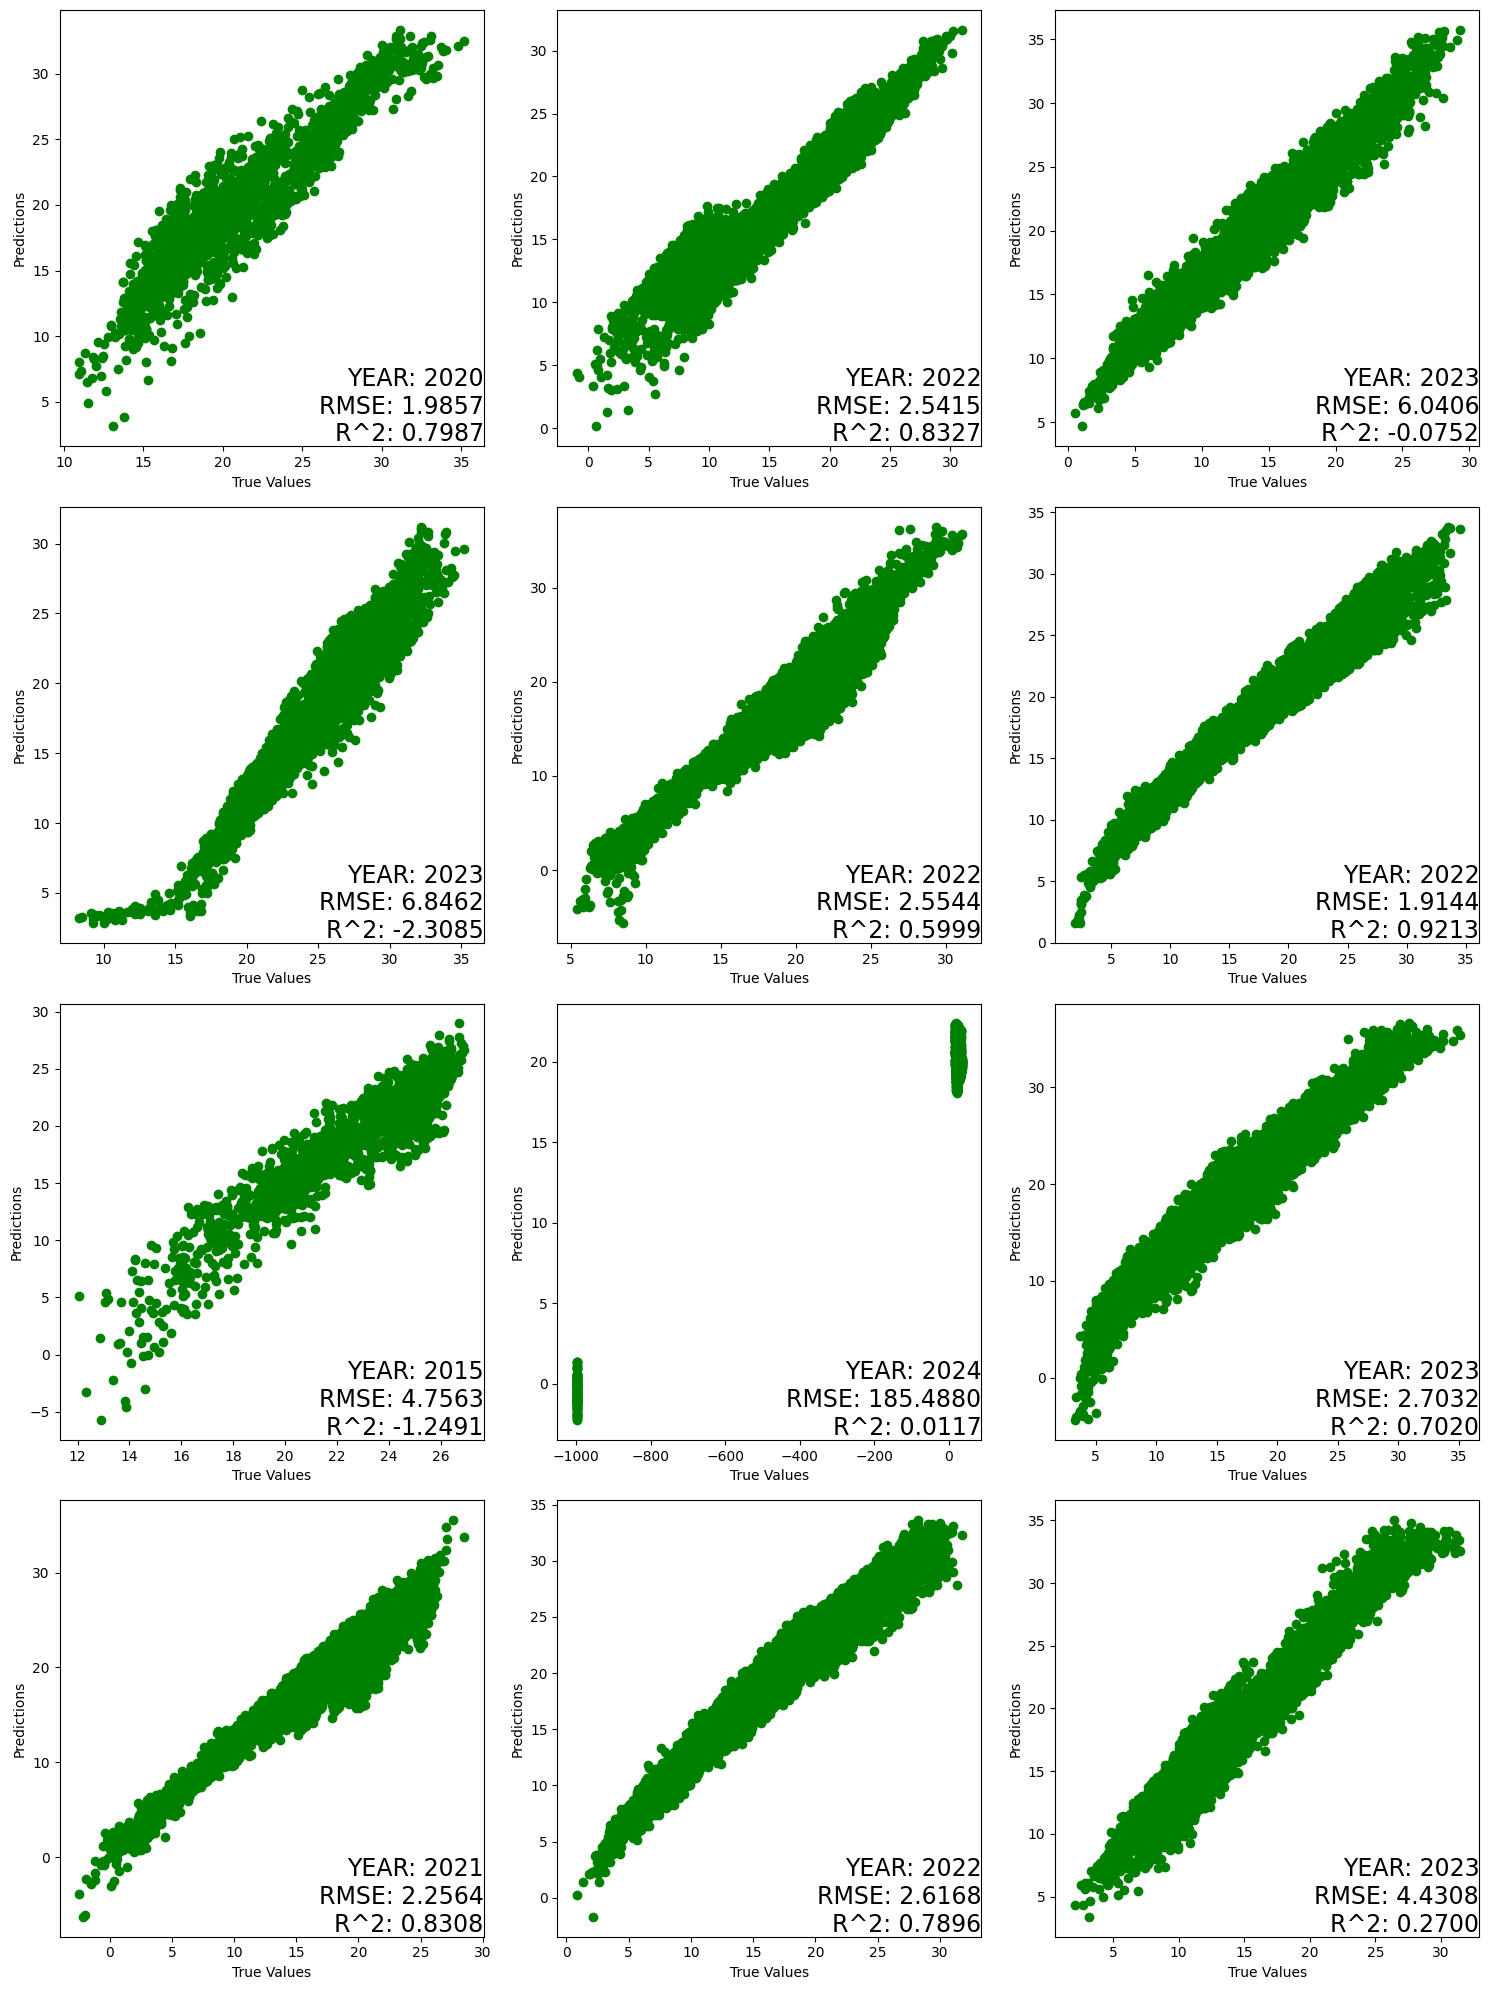

In [4]:
# Find all CSV files starting with "test"
test_files = glob('../data/test*.csv')

# Calculate number of rows needed for the grid
n_plots = len(test_files)
n_rows = (n_plots + 2) // 3  # Round up division
n_cols = min(n_plots, 3)

# Create a grid of plots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten the axes if necessary
if n_plots == 1:
    axes = [axes]

# Iterate over each file, predict, plot, and display statistics
for ax, file in zip(axes.flatten(), test_files):
    # Load data
    data = pd.read_csv(file)
    print(f"Processing {file}...")
    predict_plot_statistics(ax, data)

# Adjust layout
plt.tight_layout()
plt.show()
